In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Once upon a time, in a faraway forest, a group of adventurous researchers were determined to uncover the secrets of the local squirrel population. They had heard about the average weight of squirrels being around 1kg, but they wanted to see if their local squirrels were an exception. To embark on this exciting quest, they armed themselves with scales and safety gloves to capture and weigh as many squirrels as they could find!

Just as one of the researchers, like a cheetah on the prowl, darted towards a squirrel nearby, the director of the experiment blared out: "Hold your horses! Retreat to the fortress!" The riddle in her words soon unfurled as she enlightened them on the importance of mapping the treasure hunt – defining the experiment – before plunging into the wild thrills of data collection.

**MANUEL APPROACH**

In [2]:
import pandas as spd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t


**Hypothesis**

H0: 𝜇s=1

H1: 𝜇s!=1

**Data**

In [3]:
squirrels = [1.3, 0.47, 1.5, 1.66, 2.43, 1.29, 0.94, 1.06, 1.03, 0.76, 0.6, 0.76, 0.32, 2.2, 1.24, 1.8, 1.66, 0.51,
                       0.72, 1.62, 0.7, 0.76, 0.9, 0.93, 0.98, 0.42, 0.59, 0.12, 0.95, 0.55, 0.16, 1.25, 0.42, 0.64, 0.66,
                       1.04, 0.49,0.41, 0.4, 0.81, 0.71, 0.04, 0.6, 2.44, 1.61, 0.13, 2.08, 0.7, 0.61, 0.58, 0.77, 0.67, 1.16,
                       0.31, 0.3, 0.66, 0.03, 0.54, 0.63, 1.03, 0.73, 2.02]

In [4]:
data=np.array(squirrels)
data

array([1.3 , 0.47, 1.5 , 1.66, 2.43, 1.29, 0.94, 1.06, 1.03, 0.76, 0.6 ,
       0.76, 0.32, 2.2 , 1.24, 1.8 , 1.66, 0.51, 0.72, 1.62, 0.7 , 0.76,
       0.9 , 0.93, 0.98, 0.42, 0.59, 0.12, 0.95, 0.55, 0.16, 1.25, 0.42,
       0.64, 0.66, 1.04, 0.49, 0.41, 0.4 , 0.81, 0.71, 0.04, 0.6 , 2.44,
       1.61, 0.13, 2.08, 0.7 , 0.61, 0.58, 0.77, 0.67, 1.16, 0.31, 0.3 ,
       0.66, 0.03, 0.54, 0.63, 1.03, 0.73, 2.02])

In [5]:
n=len(data)
n

62

**Alpha, mean and standard deviation**

In [6]:
alpha=0.01
mu=1
df=61
s_mean=data.mean()
s_std=np.std(data, ddof=1)
print(f"The mean of the sample is {round(s_mean, 4)}")
print(f"The standard deviation of the sample is {round(s_std, 4)}")

The mean of the sample is 0.8935
The standard deviation of the sample is 0.5745


In [7]:
sem=s_std/n**0.5
t_stat=(s_mean-mu)/(sem)
t_crit=2.66
print(f"The degrees_of_freedom of the sample is {df}")
print(f"The SEM of the sample is {round(sem, 4)}")
print(f"The t_stat of the sample is {round(t_stat, 4)}")
print(f"The t_crit of the sample is {round(t_crit, 4)}")

The degrees_of_freedom of the sample is 61
The SEM of the sample is 0.073
The t_stat of the sample is -1.459
The t_crit of the sample is 2.66


In [8]:
if abs(t_stat)>abs(t_crit):
    print("H0 is rejected")
else:
    print("H0 is not rejected")

H0 is not rejected


**Two-tailed t-test visualization (99%)**

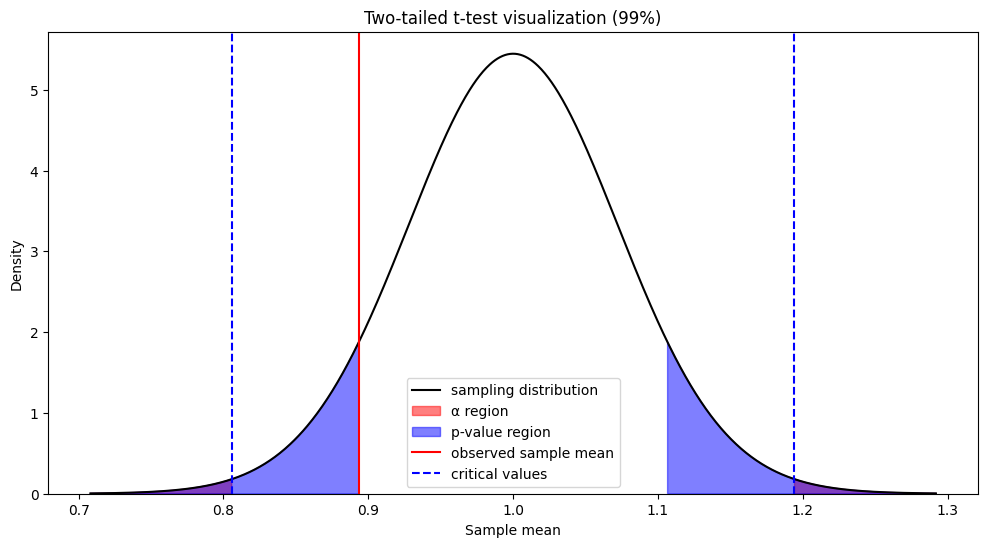

In [9]:
xt = np.linspace(mu - 4*sem, mu + 4*sem, 1000)
pdf = t.pdf((xt-mu)/sem, df)/sem

plt.figure(figsize=(12,6))
plt.plot(xt, t.pdf((xt-mu)/sem, df=df)/sem, color="black", label="sampling distribution")

plt.fill_between(xt, 0, t.pdf((xt-mu)/sem, df=df)/sem,
                 where=(xt <= mu - t_crit*sem) | (xt >= mu + t_crit*sem),
                 color='red', alpha=0.5, label='α region') # here alpha is used for opacity in fill_between, it is not related with alpha=0.01, they are different

plt.fill_between(xt, 0, pdf, where=(xt <= s_mean) | (xt >= mu + (mu - s_mean)),
                 color='blue', alpha=0.5, label='p-value region')

plt.axvline(s_mean, color="red", label="observed sample mean")

plt.axvline(mu - t_crit*sem, color="blue", linestyle="--", label="critical values")
plt.axvline(mu + t_crit*sem, color="blue", linestyle="--")

plt.ylim(bottom=0)
plt.legend()
plt.xlabel("Sample mean")
plt.ylabel("Density")
plt.title("Two-tailed t-test visualization (99%)")
plt.show()


**Visualization of SEM, Sample Mean, Population Mean and t_stat**

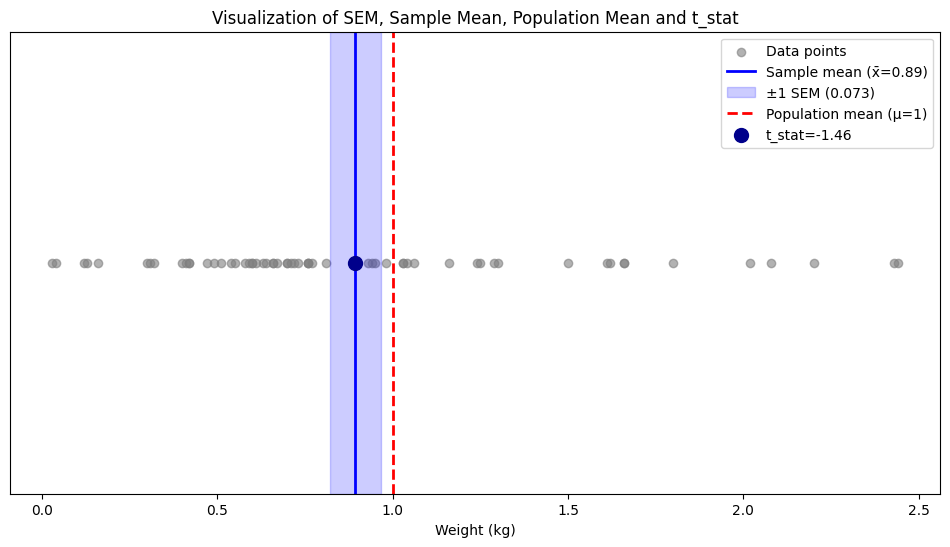

In [10]:
xt = np.linspace(min(data)-0.1, max(data)+0.1, 500)

plt.figure(figsize=(12,6))

plt.scatter(data, np.zeros_like(data), color='gray', alpha=0.6, label='Data points')

plt.axvline(s_mean, color='blue', linewidth=2, label=f'Sample mean (x̄={s_mean:.2f})')

plt.axvspan(s_mean - sem, s_mean + sem, color='blue', alpha=0.2, label=f'±1 SEM ({sem:.3f})')

plt.axvline(mu, color='red', linestyle='--', linewidth=2, label=f'Population mean (μ={mu})')

plt.scatter([s_mean], [0], color='darkblue', s=100, zorder=5, label=f't_stat={t_stat:.2f}')

plt.title('Visualization of SEM, Sample Mean, Population Mean and t_stat')
plt.xlabel('Weight (kg)')
plt.yticks([])
plt.legend()
plt.show()


Now let's write this codes with coder's approach which is shorter:

**The Coder's Approach**

In [11]:
squirrels_s=np.array(squirrels)

In [12]:
from scipy.stats import ttest_1samp

t_score, pvalue = ttest_1samp(squirrels_s, popmean= 1, alternative='two-sided') #alternative=greater or alternative=less
t_score, pvalue

(np.float64(-1.459010954883512), np.float64(0.14969253082162412))

In [13]:
alpha=0.01
if pvalue<alpha:
    print("H0 is rejected")
else:
    print("H0 is not rejected")

H0 is not rejected


In [14]:
mu = 1.0
s_mean = squirrels_s.mean()
s = squirrels_s.std(ddof=1)
n = len(squirrels_s)
sem = s / np.sqrt(n)
df = n - 1
t_crit = t.ppf(1 - alpha/2, df)

**Visualization with coder's approach**

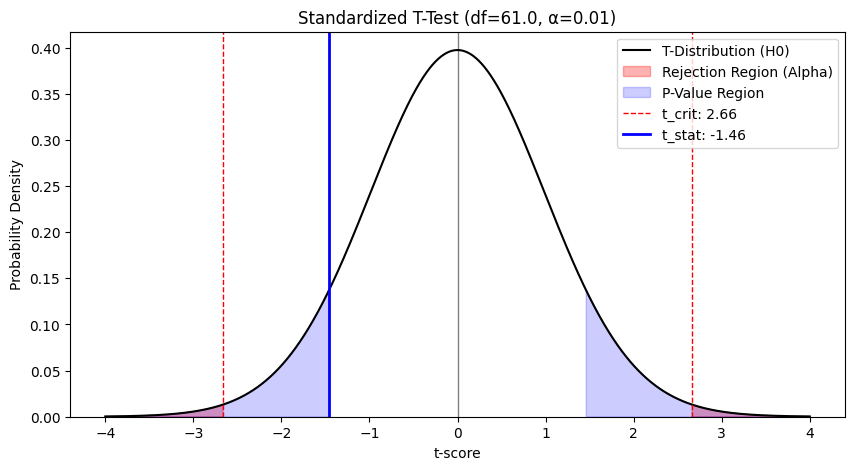

In [15]:
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df)

plt.figure(figsize=(10, 5))
plt.plot(x, y, color='black', label="T-Distribution (H0)")
plt.axvline(0, color='black', ls='-', lw=1, alpha=0.5)
plt.fill_between(x, y, where=(x <= -t_crit) | (x >= t_crit), 
                 color='red', alpha=.3, label="Rejection Region (Alpha)")
plt.fill_between(x, 0, y, where=(x <= -abs(t_score)) | (x >= abs(t_score)), 
                 color='blue', alpha=.2, label="P-Value Region")
plt.axvline(t_crit, color='red', ls='--', lw=1, label=f"t_crit: {t_crit:.2f}")
plt.axvline(-t_crit, color='red', ls='--', lw=1)
plt.axvline(t_score, color='blue', ls='-', lw=2, label=f"t_stat: {t_score:.2f}")

plt.title(f"Standardized T-Test (df={df:.1f}, α={alpha})")
plt.xlabel("t-score")
plt.ylabel("Probability Density")
plt.legend(loc='upper right')
plt.grid(False)
plt.ylim(bottom=0)
plt.show()